<a href="https://colab.research.google.com/github/budhiacharya/AI-Lesson/blob/main/Assignment_6_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: House Price Prediction Using California Housing Data

Task 1:  Importing all the necessary libraries for data handling, visualization, and model building.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Task 2: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame

In [4]:
# Load dataset as DataFrame directly
cali = fetch_california_housing(as_frame=True)
df = cali.frame.copy()  # includes features and target "MedHouseVal"

Task 3: Quick Check of Data:

In [5]:
display(df.head())
print("\nData types and non-null counts:")
print(df.info())
print("\nSummary statistics:")
display(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


All independent and dependent variables are continuous. Dependent variable (MedHouseVal) is units of 100,000.

Task 4: EDA and Data Preprocessing: Check missing/null values, Visualize relationships (scatter plots), Build a helper function to automate feature vs target plot

In [6]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


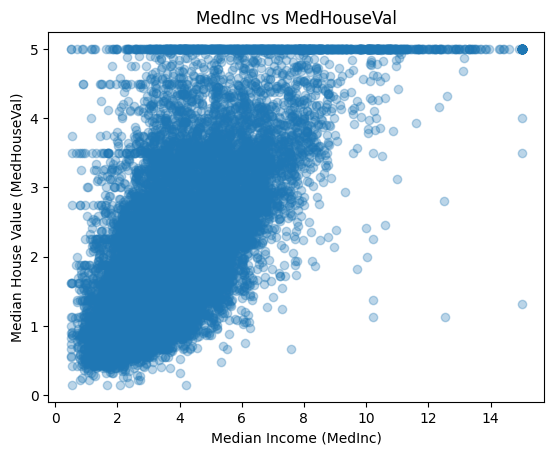

In [7]:
# Simple scatter example: MedInc vs MedHouseVal
plt.scatter(df["MedInc"], df["MedHouseVal"], alpha=0.3)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("MedInc vs MedHouseVal")
plt.show()

In [8]:
# Helper function: scatter of each feature vs target
def scatter_features_vs_target(df, features, target="MedHouseVal", alpha=0.25):
    for col in features:
        plt.scatter(df[col], df[target], alpha=alpha)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.show()

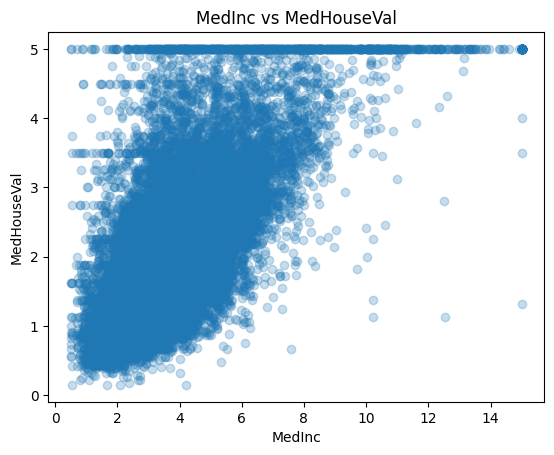

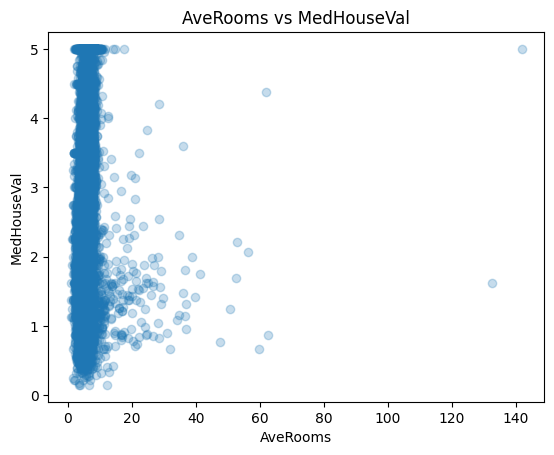

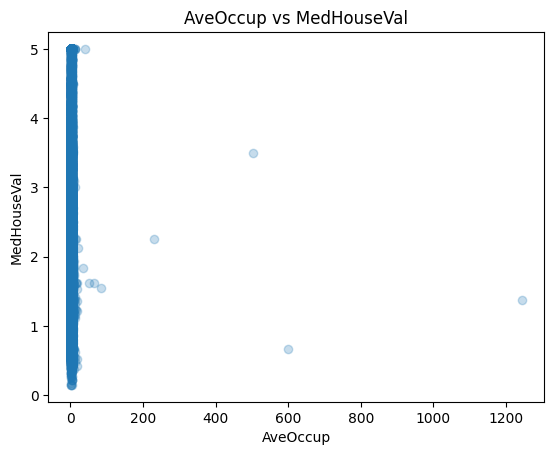

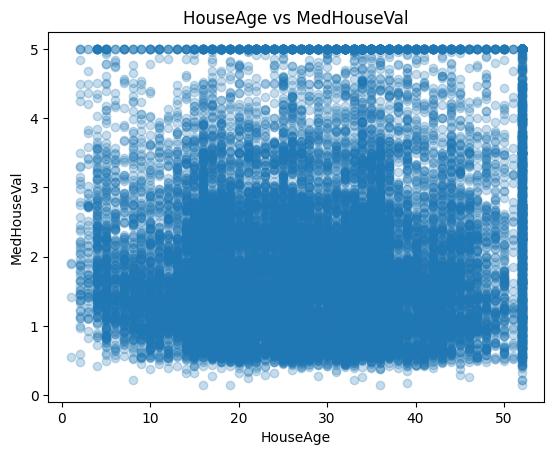

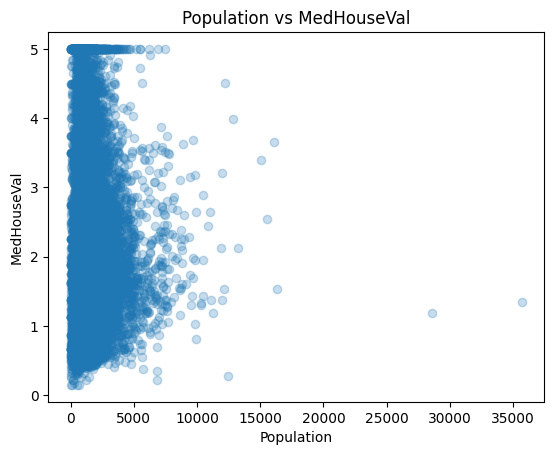

In [9]:
# Use the function to visualize multiple features
features_to_plot = ["MedInc", "AveRooms", "AveOccup", "HouseAge", "Population"]
scatter_features_vs_target(df, features_to_plot, target="MedHouseVal")

Task 5: ML Model Training: Split data into train/test (80/20), Train a Linear Regression model

In [11]:
# Define X (features) and y (target)
feature_cols = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude"
]
X = df[feature_cols]
y = df["MedHouseVal"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Define model
linreg = LinearRegression()

# Train (fit) the model
linreg.fit(X_train, y_train)

LinearRegression()

Task 6: Model Evaluation: Predict on the test set, Compute RMSE and R-squared.

In [12]:
# Predict
y_pred = linreg.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

RMSE: 0.7456
R-squared: 0.5758


Task 7: Model Prediction: Predict Median House Value from a new set of feature inputs.
Example input:MedInc=3, HouseAge=30,AveRooms=6, AveBedrms=1, Population=1500, AveOccup=3, Latitude=34, Longitude=-118

In [13]:
new_example = pd.DataFrame([{
    "MedInc": 3.0,
    "HouseAge": 30.0,
    "AveRooms": 6.0,
    "AveBedrms": 1.0,
    "Population": 1500.0,
    "AveOccup": 3.0,
    "Latitude": 34.0,
    "Longitude": -118.0
}])

pred_value = linreg.predict(new_example)[0]
print(f"Predicted MedHouseVal (in $100,000s): {pred_value:.3f}")
print(f"Approx. in dollars: ${pred_value * 100_000:,.0f}")

Predicted MedHouseVal (in $100,000s): 1.549
Approx. in dollars: $154,866


Task 8: Extra task: Correlation heatmap and Residual plot

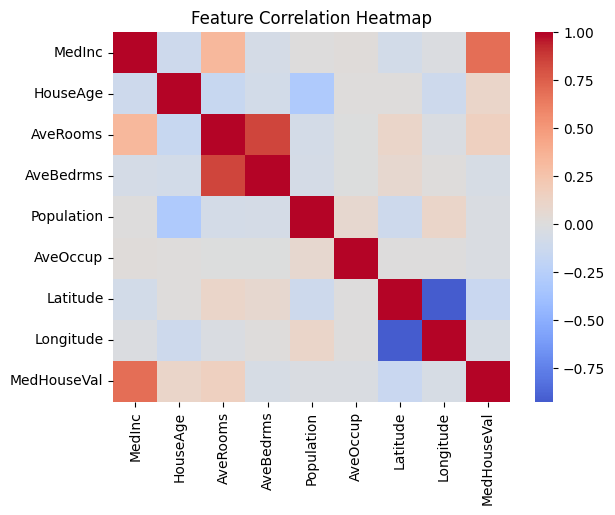

In [14]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

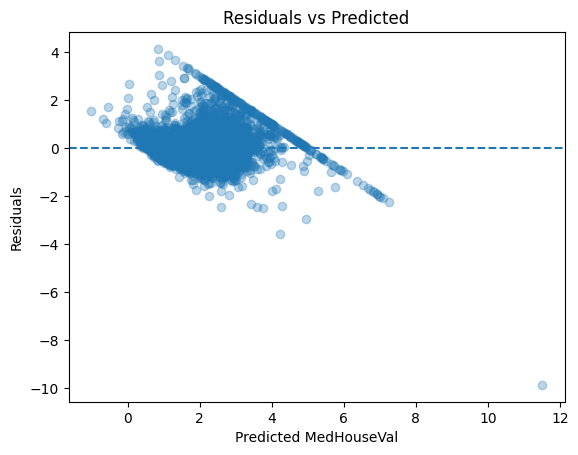

In [15]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted MedHouseVal")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()